In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Инициализация фигуры для общего графика

colors = {
    "en-ru": "blue",
    "en-fr": "teal",
    "en-hi": "black",
    "en-ar": "purple",
    "en-es": "brown",
    "en-it": "navy"
}

markers = {
    "en-ru": "v",
    "en-fr": "X",
    "en-hi": "8",
    "en-ar": "s",
    "en-es": "d",
    "en-it": "D"
}

In [2]:
def load_by_pair_data(path):
    raw_data = pd.read_csv(path, sep=';')
    # Преобразование строки со значениями в список чисел
    raw_data['Value'] = raw_data['Value'].apply(ast.literal_eval)

    # Подготовка данных для построения графиков
    data_by_pair = raw_data.groupby('Language Pair')['Value'].apply(list)
    return data_by_pair

In [4]:
def plot_by_lang(data_by_pair, title, ylabel, xlabel='Слой'):
    # Инициализация фигуры для общего графика
    plt.figure(figsize=(12, 8))


    for (lang_pair, values) in data_by_pair.items():
        # Объединение всех списков значений в один массив для удобства обработки
        values_array = np.array(values)

        # Вычисление минимального, максимального и среднего значения в каждой точке
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)

        # Построение графика
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")

        plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(1, len(mean_values) + 1))
    plt.legend()
    plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
    plt.show()

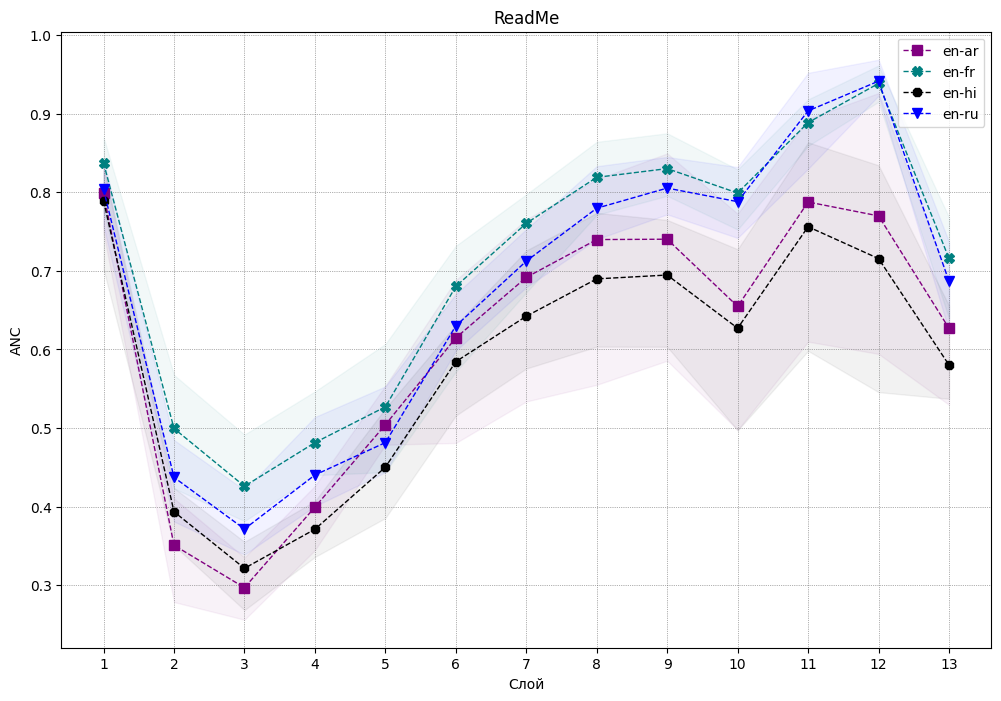

In [5]:
data_by_pair = load_by_pair_data('./parallel/ANC_ReadMe.txt')
plot_by_lang(data_by_pair, 'ReadMe', 'ANC')

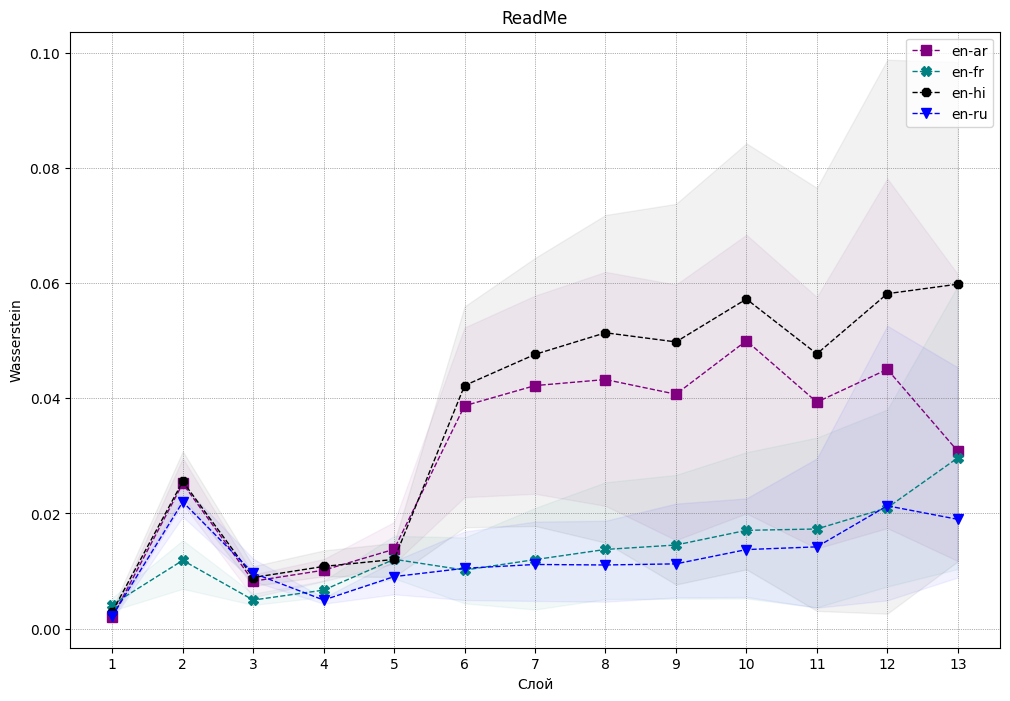

In [6]:
data_by_pair = load_by_pair_data('./parallel/wasserstein_ReadMe.txt')
plot_by_lang(data_by_pair, 'ReadMe', 'Wasserstein')

In [7]:
data_XNLI_by_pair = load_by_pair_data('./parallel/ANC_XNLI.txt')
data_VvsW_by_pair = load_by_pair_data('./parallel/ANC_VvsW.txt')
data_Readme_by_pair = load_by_pair_data('./parallel/ANC_Readme.txt')

data_dict_ANC = {'XNLI': data_XNLI_by_pair, 'Readme++': data_Readme_by_pair, 'Vikidia vs Wikipedia': data_VvsW_by_pair}


data_XNLI_by_pair = load_by_pair_data('./parallel/wasserstein_XNLI.txt')
data_VvsW_by_pair = load_by_pair_data('./parallel/wasserstein_VvsW.txt')
data_Readme_by_pair = load_by_pair_data('./parallel/wasserstein_Readme.txt')

data_dict_wasserstein = {'XNLI': data_XNLI_by_pair, 'Readme++': data_Readme_by_pair, 'Vikidia vs Wikipedia': data_VvsW_by_pair}

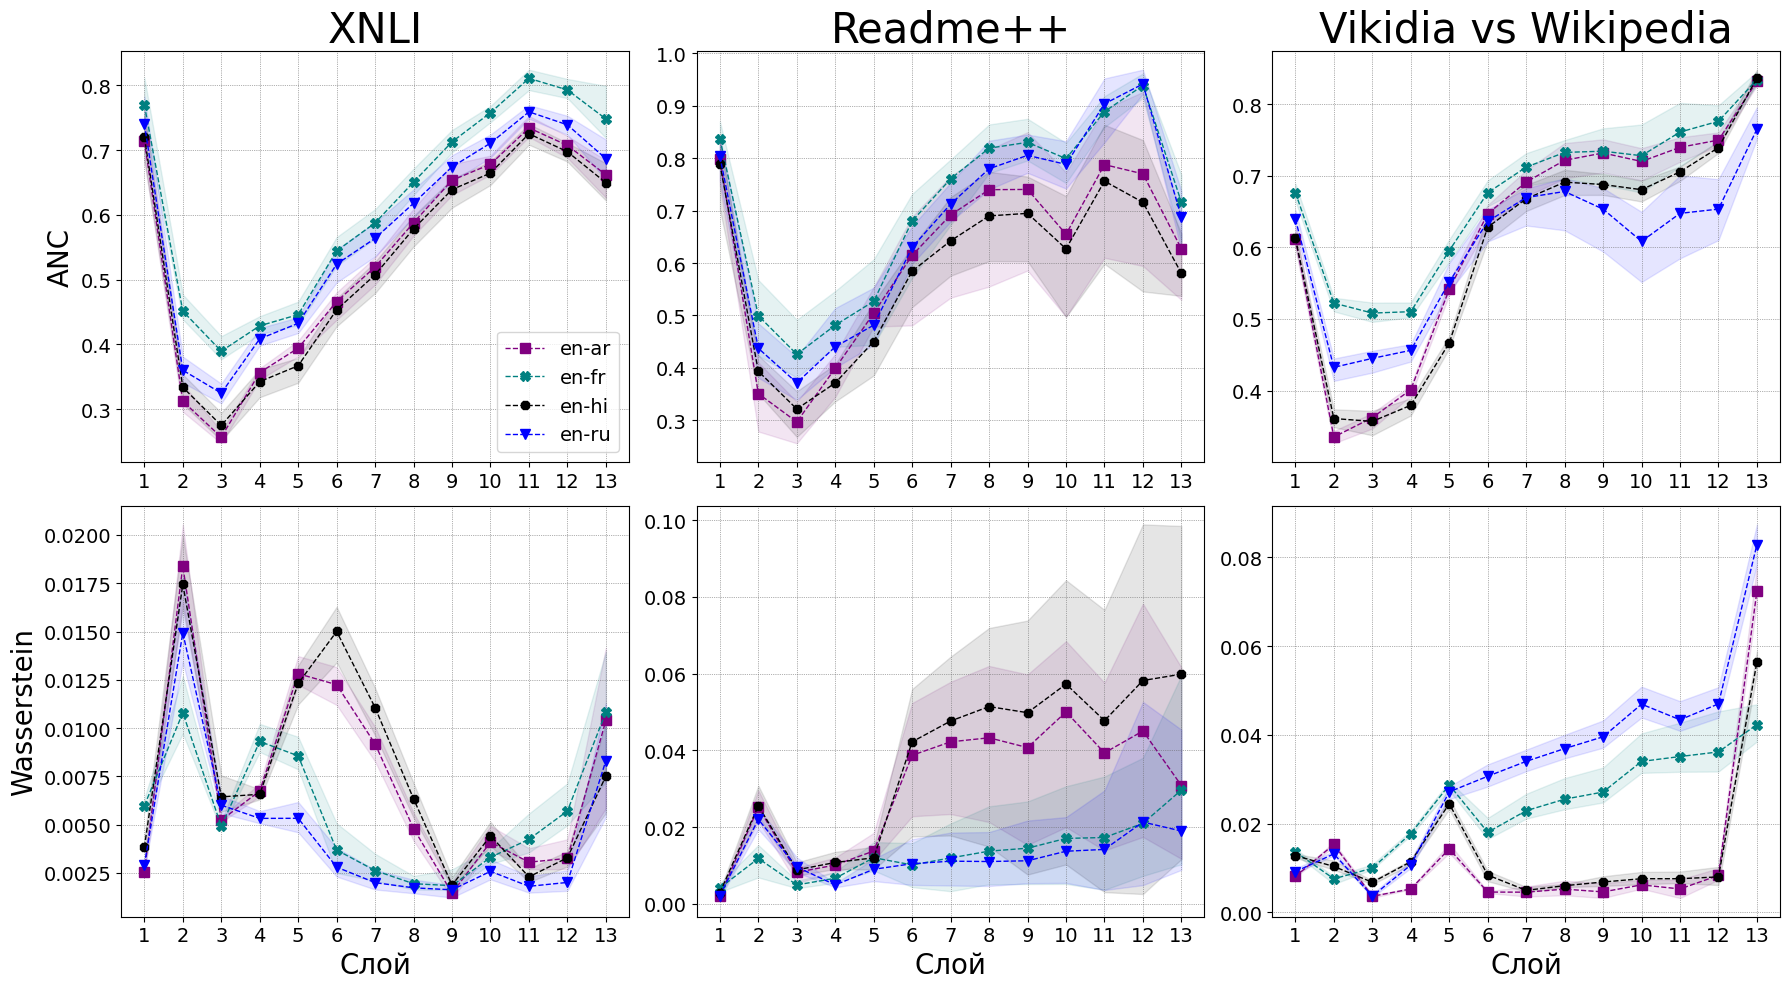

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict_ANC.items()):
    # Выбор текущей оси
    ax = axs[0, idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    ax.set_title(data_key, size=30)
    #ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('ANC', size=20)
        ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)


# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict_wasserstein.items()):
    # Выбор текущей оси
    ax = axs[1, idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    #ax.set_title(data_key, size=30)
    ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('Wasserstein', size=20)
        #ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


In [10]:
# Считывание ANC и Wasserstein
def read_data(file_path):
    data = pd.read_csv(file_path, sep=';')
    data['Value'] = data['Value'].apply(ast.literal_eval)
    return data.groupby('Language Pair')['Value'].apply(list)

# Считывание F1 
def read_f1_data(file_path):
    data = pd.read_csv(file_path)
    data['Value'] = data['Value'].apply(ast.literal_eval)
    data.set_index('Language', inplace=True)
    return data.groupby('Language')['Value'].apply(lambda x: list(x)[0])

ANC_XNLI = read_data('./parallel/ANC_XNLI.txt')
ANC_Readme = read_data('./parallel/ANC_ReadMe.txt')
ANC_VvsW = read_data('./parallel/ANC_VvsW.txt')

Wasserstein_XNLI = read_data('./parallel/wasserstein_XNLI.txt')
Wasserstein_Readme = read_data('./parallel/wasserstein_ReadMe.txt')
Wasserstein_VvsW = read_data('./parallel/wasserstein_VvsW.txt')

f1_XNLI = read_f1_data('./parallel/f1_XNLI.csv')
f1_Readme = read_f1_data('./parallel/f1_ReadMe.csv')
f1_VvsW = read_f1_data('./parallel/f1_VvsW.csv')

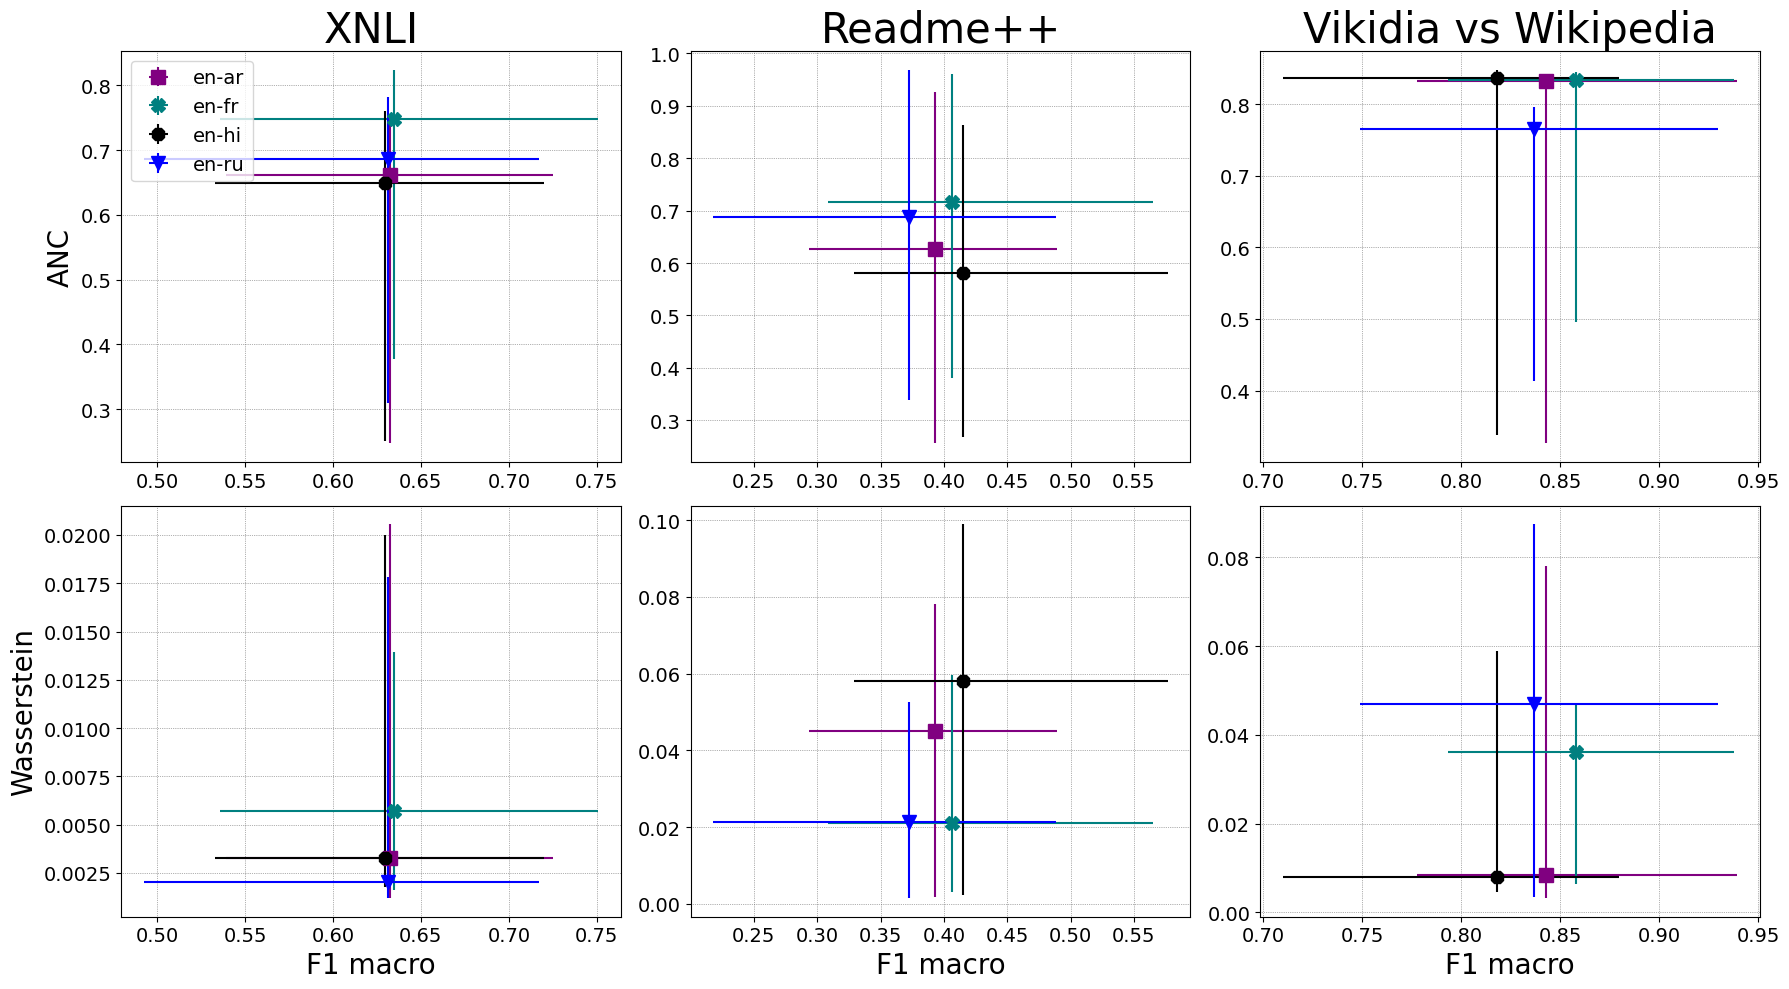

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

datasets_ANC = [("XNLI", f1_XNLI, ANC_XNLI), ("Readme++", f1_Readme, ANC_Readme), ("Vikidia vs Wikipedia", f1_VvsW, ANC_VvsW)]

for idx, (title, f1_dict, anc_dict) in enumerate(datasets_ANC):
    ax = axs[0, idx]
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            ANC_mean = np.mean(anc_dict[f"en-{lang}"], axis=0)[-1]
            ANC_min = np.min(anc_dict[f"en-{lang}"])
            ANC_max = np.max(anc_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, ANC_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[ANC_mean - ANC_min], [ANC_max - ANC_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")

    ax.set_title(title, size=30)
    #ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("ANC", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

datasets_wasserstein = [("XNLI", f1_XNLI, Wasserstein_XNLI), ("Readme++", f1_Readme, Wasserstein_Readme), ("Vikidia vs Wikipedia", f1_VvsW, Wasserstein_VvsW)]

for idx, (title, f1_dict, Wasserstein_dict) in enumerate(datasets_wasserstein):
    ax = axs[1, idx]
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            Wasserstein_mean = np.mean(Wasserstein_dict[f"en-{lang}"], axis=0)[-2]
            Wasserstein_min = np.min(Wasserstein_dict[f"en-{lang}"])
            Wasserstein_max = np.max(Wasserstein_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, Wasserstein_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[Wasserstein_mean - Wasserstein_min], [Wasserstein_max - Wasserstein_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")
    
    #ax.set_title(title, size=30)
    ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("Wasserstein", size=20)
        #ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


In [12]:
# Считывание ANC и Wasserstein
def read_data(file_path):
    data = pd.read_csv(file_path, sep=';')
    data['Value'] = data['Value'].apply(ast.literal_eval)
    return data.groupby('Language Pair')['Value'].apply(list)

# Считывание F1 
def read_f1_data(file_path):
    data = pd.read_csv(file_path)
    data['Value'] = data['Value'].apply(ast.literal_eval)
    data.set_index('Language', inplace=True)
    return data.groupby('Language')['Value'].apply(lambda x: list(x)[0])

ANC_XNLI = read_data('./parallel/ANC_XNLI.txt')
ANC_Readme = read_data('./parallel/ANC_ReadMe.txt')
ANC_VvsW = read_data('./parallel/ANC_VvsW.txt')

Wasserstein_XNLI = read_data('./parallel/wasserstein_XNLI.txt')
Wasserstein_Readme = read_data('./parallel/wasserstein_ReadMe.txt')
Wasserstein_VvsW = read_data('./parallel/wasserstein_VvsW.txt')

f1_XNLI = read_f1_data('./parallel/f1_XNLI.csv')
f1_Readme = read_f1_data('./parallel/f1_ReadMe.csv')
f1_VvsW = read_f1_data('./parallel/f1_VvsW.csv')

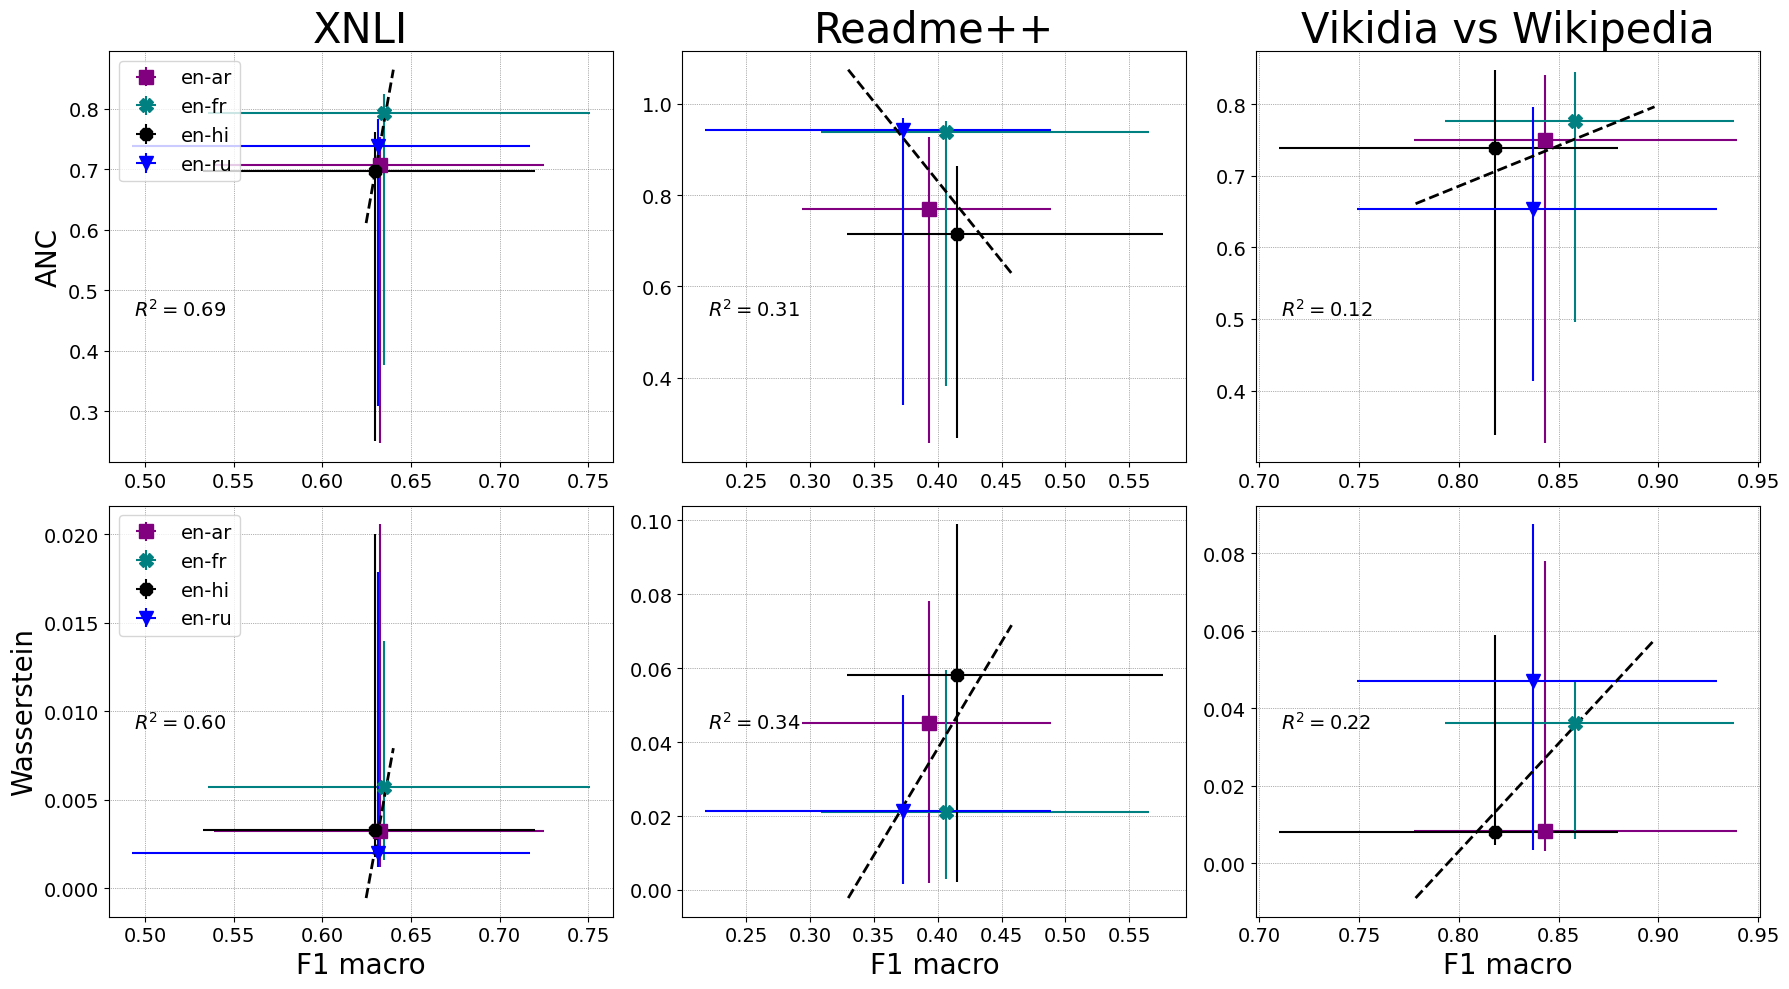

In [13]:
datasets = [("XNLI", f1_XNLI, ANC_XNLI), ("Readme++", f1_Readme, ANC_Readme), ("Vikidia vs Wikipedia", f1_VvsW, ANC_VvsW)]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for idx, (title, f1_dict, anc_dict) in enumerate(datasets):
    ax = axs[0, idx]
    x_vals = []
    y_vals = []
    
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            ANC_mean = np.mean(anc_dict[f"en-{lang}"], axis=0)[-2]
            ANC_min = np.min(anc_dict[f"en-{lang}"])
            ANC_max = np.max(anc_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, ANC_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[ANC_mean - ANC_min], [ANC_max - ANC_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")

            x_vals.append(f1_mean)
            y_vals.append(ANC_mean)
    
    # Линейная аппроксимация
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)

    delta_x = max(x_vals) - min(x_vals)
    x = np.linspace(min(x_vals) - delta_x, max(x_vals) + delta_x, 100)
    y = intercept + slope * x
    ax.plot(x, y, color='black', linestyle='--', linewidth=2)
    
    # r^2
    r_squared = r_value**2
    ax.text(0.05, 0.4, f'$R^2 = {r_squared:.2f}$', transform=ax.transAxes, fontsize=14, verticalalignment='top')
    
    ax.set_title(title, size=30)
    if idx == 0:
        ax.set_ylabel("ANC", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

datasets = [("XNLI", f1_XNLI, Wasserstein_XNLI), ("Readme++", f1_Readme, Wasserstein_Readme), ("Vikidia vs Wikipedia", f1_VvsW, Wasserstein_VvsW)]

for idx, (title, f1_dict, Wasserstein_dict) in enumerate(datasets):
    ax = axs[1, idx]
    x_vals = []
    y_vals = []
    
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            Wasserstein_mean = np.mean(Wasserstein_dict[f"en-{lang}"], axis=0)[-2]
            Wasserstein_min = np.min(Wasserstein_dict[f"en-{lang}"])
            Wasserstein_max = np.max(Wasserstein_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, Wasserstein_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[Wasserstein_mean - Wasserstein_min], [Wasserstein_max - Wasserstein_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")
    

            x_vals.append(f1_mean)
            y_vals.append(Wasserstein_mean)
    
    # Линейная аппроксимация
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)

    delta_x = max(x_vals) - min(x_vals)
    x = np.linspace(min(x_vals) - delta_x, max(x_vals) + delta_x, 100)
    y = intercept + slope * x
    ax.plot(x, y, color='black', linestyle='--', linewidth=2)
    
    # r^2
    r_squared = r_value**2
    ax.text(0.05, 0.5, f'$R^2 = {r_squared:.2f}$', transform=ax.transAxes, fontsize=14, verticalalignment='top')
    
    #ax.set_title(title, size=30)
    ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("Wasserstein", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()